# Introdução ao Projeto:

O foco principal deste projeto é analisar dados provenientes de um teste A/B, com o objetivo de entender a eficácia de diferentes variações de produto/serviço ou estratégias em melhorar indicadores-chave de desempenho (KPIs), como taxa de conversão, receita, retenção de clientes, entre outros.

O teste A/B é uma metodologia experimental comumente utilizada para comparar duas ou mais versões de um produto, serviço ou página de um site para determinar qual versão oferece melhores resultados. Este processo é crucial para fundamentar decisões de negócios com base em dados quantitativos e evidências claras, evitando escolhas impulsivas e não fundamentadas.

Neste projeto, trabalharemos com o dataset "hypotheses_us.csv", que contém informações sobre diferentes hipóteses testadas em um experimento. O objetivo é aplicar análise de dados para verificar quais hipóteses apresentam uma diferença significativa em relação aos KPIs definidos.

# Principais Métricas e Processos de Análise:

1) Preparação dos dados para análise:
A preparação dos dados é a base para garantir que as conclusões tiradas a partir da análise sejam precisas e confiáveis.

2) Teste de hipóteses:
Priorizando aquelas que possuem maior potencial de impactar os KPIs e que são viáveis de testar. 

3) Graficos:
A interpretação de gráficos é uma parte fundamental da análise. Analisaremos os gráficos que mostram a distribuição dos dados, comparações entre grupos (controle e tratamento) e evolução ao longo do tempo.

4) Significância estatística:
Para avaliar se as diferenças observadas entre os grupos no teste A/B são estatisticamente significativas, aplicaremos testes de hipóteses, como o teste t ou teste de Mann-Whitney, dependendo da natureza dos dados. A significância estatística nos ajudará a determinar se podemos ou não rejeitar a hipótese nula, ou seja, se a diferença entre os grupos é real e não ocorreu por acaso.

5) Conclusões dos resultados do teste A/B:
Isso ajudará a empresa a tomar decisões mais informadas sobre a implementação de mudanças em seu produto ou serviço.

In [10]:
import pandas as pd

df = pd.read_csv('/datasets/hypotheses_us.csv')

print(df.head())


           Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...


Indetificação de erros no arquivo, abaixo irei tratar para ter um df mais limpo.

In [11]:
df = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

df.columns = df.columns.str.strip()

df = df.replace({',': '.'}, regex=True)

print(df.head())

print("-" * 125)

print(df.info())

print("-" * 125)

print("\nValores ausentes por coluna:")
print(df.isnull().sum())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3 

# Alcance dos Usuários (Reach):

O alcance mede o impacto potencial de cada hipótese em termos de usuários. Em uma escala de 1 a 10, valores mais altos significam um alcance maior, ou seja, a hipótese pode impactar mais pessoas. O resumo estatístico dos valores de alcance (Reach) é:

- Média: 4.78 — Em média, as hipóteses têm um alcance moderado.
- Desvio Padrão: 3.15 — Há uma grande variação entre as hipóteses. Algumas têm um alcance muito baixo, outras muito alto.
- Mínimo: 1 — O menor valor de alcance é 1, indicando que pelo menos uma hipótese tem um alcance muito baixo.
- Máximo: 10 — A hipótese com maior alcance tem um impacto máximo de 10, sugerindo que algumas ideias têm o potencial de alcançar todos os usuários.

Em termos de distribuição:

- 25% dos valores estão abaixo de 3, o que indica que uma parte das hipóteses tem um alcance mais baixo.
- 50% dos valores (mediana) estão abaixo de 3, indicando que metade das hipóteses têm um alcance pequeno.
- 75% dos valores estão abaixo de 8, ou seja, a maioria das hipóteses tem um alcance moderado ou alto.

In [12]:
# 1. Hypotheses: Descrições das hipóteses
# ==============================

hypotheses = df['Hypothesis'].dropna()
print("\nHipóteses descritas:")
print(hypotheses.head())

# ==============================
# 2. Reach: Alcance do usuário (Escala 1-10)
# ==============================

reach = df['Reach'].dropna()
print("\nAlcance dos usuários (Reach):")
print(reach.describe())


Hipóteses descritas:
0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
Name: Hypothesis, dtype: object

Alcance dos usuários (Reach):
count     9.000000
mean      4.777778
std       3.153481
min       1.000000
25%       3.000000
50%       3.000000
75%       8.000000
max      10.000000
Name: Reach, dtype: float64


# Impacto nos Usuários (Impact):
O impacto avalia o efeito esperado de cada hipótese nos usuários, em uma escala de 1 a 10, sendo que valores mais altos indicam um maior impacto.

- Média: 4.78 — O impacto médio das hipóteses é moderado, o que sugere que muitas das hipóteses têm um impacto positivo, mas não necessariamente transformador.
- Desvio Padrão: 3.19 — Assim como o alcance, há uma variação considerável nas avaliações de impacto entre as hipóteses.
- Mínimo: 1 — Uma hipótese tem um impacto muito baixo.
- Máximo: 10 — Uma hipótese é avaliada com impacto máximo.

Distribuição:

- 25% dos valores estão abaixo de 3, indicando que uma parte das hipóteses é considerada de baixo impacto.
- 50% dos valores estão abaixo de 3, sugerindo que a mediana das hipóteses tem baixo impacto.
- 75% dos valores estão abaixo de 7, significando que a maioria das hipóteses tem um impacto razoável ou moderado.

In [13]:
# ==============================
# 3. Impact: Impacto nos usuários (Escala 1-10)
# ==============================

impact = df['Impact'].dropna()
print("\nImpacto nos usuários (Impact):")
print(impact.describe())


Impacto nos usuários (Impact):
count     9.000000
mean      4.777778
std       3.192874
min       1.000000
25%       3.000000
50%       3.000000
75%       7.000000
max      10.000000
Name: Impact, dtype: float64


# Confiança na Hipótese (Confidence):

A confiança reflete o grau de certeza ou segurança na validade da hipótese, ou seja, a confiança na eficácia da ação proposta. Valores mais altos indicam maior certeza.

- Média: 5.56 — A confiança média nas hipóteses é moderada. Isso pode indicar que a equipe está razoavelmente confiante nas ideias, mas há espaço para melhorias.
- Desvio Padrão: 3.05 — A confiança varia bastante entre as hipóteses.
- Mínimo: 1 — Uma hipótese tem uma confiança muito baixa.
- Máximo: 9 — A maior confiança está em 9, o que sugere que algumas hipóteses têm forte apoio.

Distribuição:

- 25% dos valores estão abaixo de 3, indicando que algumas hipóteses são vistas com pouca confiança.
- 50% dos valores estão abaixo de 7, indicando que metade das hipóteses são relativamente confiáveis.
- 75% dos valores estão abaixo de 8, sugerindo que a maioria das hipóteses tem um nível de confiança razoável a alto.

# Esforço Necessário para Testar a Hipótese (Effort):

O esforço mede a quantidade de recursos necessários para testar cada hipótese. Quanto maior o valor, mais recursos (tempo, pessoal, dinheiro, etc.) são necessários para implementar e testar a hipótese.

Média: 4.89 — O esforço médio necessário é moderado.
Desvio Padrão: 2.80 — O esforço varia, com algumas hipóteses exigindo mais recursos do que outras.
Mínimo: 1 — Algumas hipóteses exigem um esforço muito baixo.
Máximo: 10 — Uma hipótese requer um esforço máximo.
Distribuição:

25% dos valores estão abaixo de 3, sugerindo que algumas hipóteses exigem um esforço bem baixo.
50% dos valores estão abaixo de 5, o que significa que a metade das hipóteses requer um esforço razoável.
75% dos valores estão abaixo de 6, indicando que a maioria das hipóteses exige pouco esforço.

In [14]:
# ==============================
# 4. Confidence: Confiança na hipótese (Escala 1-10)
# ==============================

confidence = df['Confidence'].dropna()
print("\nConfiança na hipótese (Confidence):")
print(confidence.describe())

# ==============================
# 5. Effort: Esforço necessário para testar (Escala 1-10)
# ==============================

effort = df['Effort'].dropna()
print("\nEsforço necessário para testar a hipótese (Effort):")
print(effort.describe())

out_of_range = df[(df['Reach'] < 1) | (df['Reach'] > 10) |
                  (df['Impact'] < 1) | (df['Impact'] > 10) |
                  (df['Confidence'] < 1) | (df['Confidence'] > 10) |
                  (df['Effort'] < 1) | (df['Effort'] > 10)]
print("\nValores fora da escala 1-10 (Reach, Impact, Confidence, Effort):")
print(out_of_range)


Confiança na hipótese (Confidence):
count    9.000000
mean     5.555556
std      3.045944
min      1.000000
25%      3.000000
50%      7.000000
75%      8.000000
max      9.000000
Name: Confidence, dtype: float64

Esforço necessário para testar a hipótese (Effort):
count     9.000000
mean      4.888889
std       2.803767
min       1.000000
25%       3.000000
50%       5.000000
75%       6.000000
max      10.000000
Name: Effort, dtype: float64

Valores fora da escala 1-10 (Reach, Impact, Confidence, Effort):
Empty DataFrame
Columns: [Hypothesis, Reach, Impact, Confidence, Effort]
Index: []


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>




# Parte 1. Priorizando Hipóteses

- Aplicar o framework ICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
- Aplicar o framework RICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
- Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.

In [15]:
# Calcular o ICE (Impact * Confidence) / Effort
df['ICE'] = (df['Impact'] * df['Confidence']) / df['Effort']

# Calcular o RICE (Reach * Impact * Confidence) / Effort
df['RICE'] = (df['Reach'] * df['Impact'] * df['Confidence']) / df['Effort']

# Classificar as hipóteses por ICE em ordem decrescente
df_sorted_ice = df.sort_values(by='ICE', ascending=False)

# Classificar as hipóteses por RICE em ordem decrescente
df_sorted_rice = df.sort_values(by='RICE', ascending=False)

# Exibir as hipóteses com as respectivas classificações
print("\nPrioridade com ICE:")
print(df_sorted_ice[['Hypothesis', 'ICE']])

print("-" * 125)

print("Prioridade com RICE:")
print(df_sorted_rice[['Hypothesis', 'RICE']])

# Explicar as diferenças
print("-" * 125)
print("Explicação das diferenças:")
print("O framework RICE leva em consideração o alcance, ou seja, quantas pessoas ou clientes serão impactados pela hipótese. Portanto, hipóteses que têm um alto alcance podem ser priorizadas no modelo RICE, mesmo que o impacto ou confiança não seja tão alto. Por outro lado, o framework ICE considera apenas impacto, confiança e esforço, o que pode resultar em uma priorização diferente, especialmente para hipóteses de alcance menor.")


Prioridade com ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000
-----------------------------------------------------------------------------------------------------------------------------
Prioridade com RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two n

# Análise de teste A/B

Inicio a etapa 2 do projeto com a analise padrão básica da composição dos dataframes que irei trabalhar:

In [20]:
orders_df = pd.read_csv('/datasets/orders_us.csv', sep=';')

orders_df.columns = orders_df.columns.str.strip()

orders_df = orders_df.replace({',': '.'}, regex=True)

print(orders_df.head())

print("-" * 125)

print(orders_df.info())

print("-" * 125)

print("\nValores ausentes por coluna:")
print(orders_df.isnull().sum())

  transactionId,visitorId,date,revenue,group
0    3667963787.3312258926.2019-08-15.30.4.B
1    2804400009.3642806036.2019-08-15.15.2.B
2    2961555356.4069496402.2019-08-15.10.2.A
3   3797467345.1196621759.2019-08-15.155.1.B
4    2282983706.2322279887.2019-08-15.40.5.B
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   transactionId,visitorId,date,revenue,group  1197 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB
None
-----------------------------------------------------------------------------------------------------------------------------

Valores ausentes por coluna:
transactionId,visitorId,date,revenue,group    0
dtype: int64


Idetificação de erros no arquivo, abaixo irei tratar para ter um df mais limpo.

In [21]:
orders_df = pd.read_csv('/datasets/orders_us.csv', sep=',')

orders_df.columns = orders_df.columns.str.strip()

orders_df = orders_df.replace({',': '.'}, regex=True)

print(orders_df.head())

print("-" * 125)

print(orders_df.info())

print("-" * 125)

print("\nValores ausentes por coluna:")
print(orders_df.isnull().sum())


   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
--------------------------------------------------------

In [22]:
visits_df = pd.read_csv('/datasets/visits_us.csv')

print(visits_df.head())

print("-" * 125)
print(visits_df.info())

print("\nValores ausentes por coluna:")
print(visits_df.isnull().sum())


         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Valores ausentes por coluna:
date      0
group     0
visits    0
dtype: int64


# Gráfico da receita acumulada por grupo:

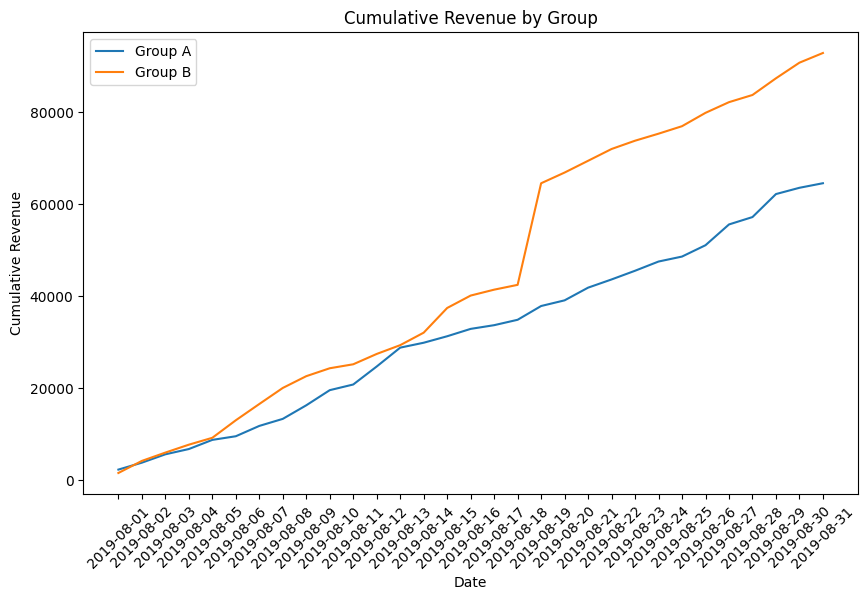

In [24]:
orders_grouped = orders_df.groupby(['date', 'group'])['revenue'].sum().reset_index()

orders_grouped['cumulative_revenue'] = orders_grouped.groupby('group')['revenue'].cumsum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for group in orders_grouped['group'].unique():
    group_data = orders_grouped[orders_grouped['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_revenue'], label=f'Group {group}')
    
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Ao analisar o gráfico de receita acumulada por grupo (A e B), é possível observar que a linha do grupo B está consistentemente acima da do grupo A. Isso indica que o grupo B gerou uma receita acumulada significativamente maior ao longo do tempo, sugerindo um desempenho superior em termos de vendas ou volume de transações durante o período analisado. Esse comportamento pode ser devido a fatores como maior volume de vendas, picos em períodos específicos ou uma estratégia de marketing mais eficaz para o grupo B. Em resumo, o grupo B teve um crescimento de receita mais rápido ou mais expressivo em comparação ao grupo A.

# Gráfico do tamanho médio acumulado do pedido por grupo

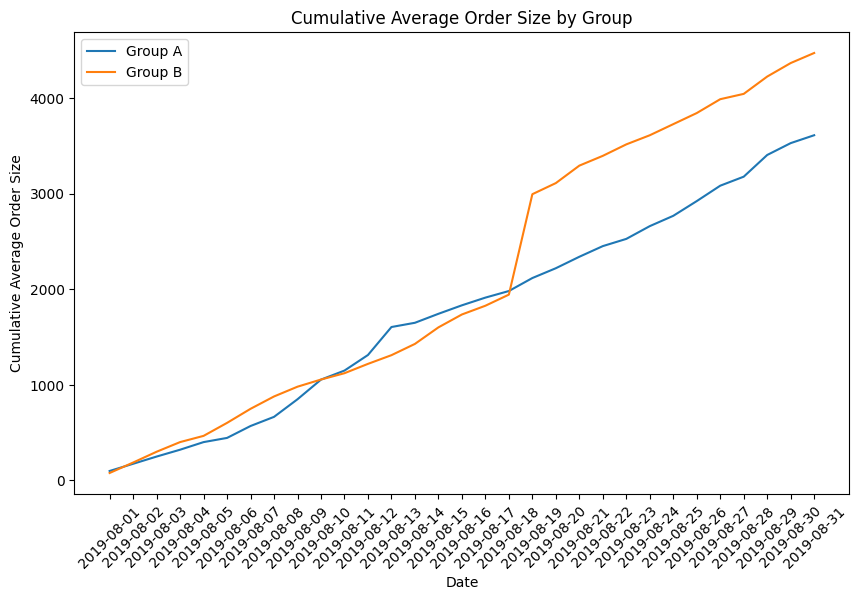

In [27]:
orders_grouped['average_order_size'] = orders_df.groupby(['date', 'group'])['revenue'].mean().reset_index()['revenue']

orders_grouped['cumulative_avg_order_size'] = orders_grouped.groupby('group')['average_order_size'].cumsum()

plt.figure(figsize=(10, 6))
for group in orders_grouped['group'].unique():
    group_data = orders_grouped[orders_grouped['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_order_size'], label=f'Group {group}')

plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.title('Cumulative Average Order Size by Group')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Ao analisar o gráfico de tamanho médio de pedido acumulado por grupo (A e B), podemos observar que, novamente, a linha do grupo B está acima da do grupo A. Isso sugere que o grupo B possui um tamanho médio de pedido maior ou mais expressivo ao longo do tempo, refletido em um crescimento mais rápido ou consistente na média acumulada.

# Gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A

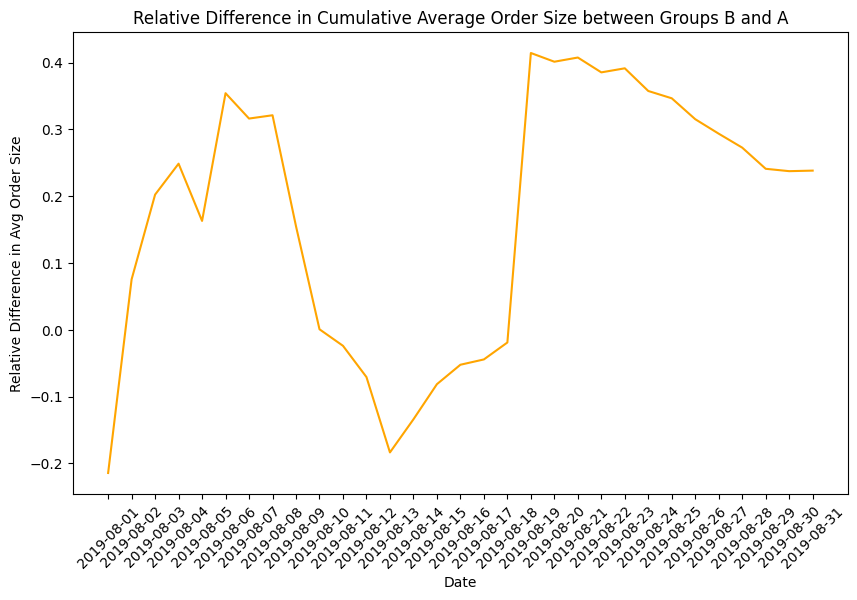

In [28]:
group_a = orders_grouped[orders_grouped['group'] == 'A']
group_b = orders_grouped[orders_grouped['group'] == 'B']

merged_groups = pd.merge(group_a[['date', 'cumulative_avg_order_size']], 
                         group_b[['date', 'cumulative_avg_order_size']], 
                         on='date', 
                         suffixes=('_A', '_B'))

merged_groups['relative_diff'] = (merged_groups['cumulative_avg_order_size_B'] - merged_groups['cumulative_avg_order_size_A']) / merged_groups['cumulative_avg_order_size_A']

plt.figure(figsize=(10, 6))
plt.plot(merged_groups['date'], merged_groups['relative_diff'], label='Relative Difference (B vs A)', color='orange')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Avg Order Size')
plt.title('Relative Difference in Cumulative Average Order Size between Groups B and A')
plt.xticks(rotation=45)
plt.show()


O gráfico gerado com a diferença relativa acumulada no tamanho do pedido entre os grupos A e B mostra uma única linha (representando a diferença entre os dois grupos ao longo do tempo) com alguns picos. Isso sugere que, ao longo do período analisado, o grupo B apresentou flutuações em relação ao grupo A, com períodos específicos em que a diferença relativa entre os tamanhos médios de pedido foi mais pronunciada.


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito, a diferença relativa foi devidamente analisada.
</div>


# Taxa de conversão diária

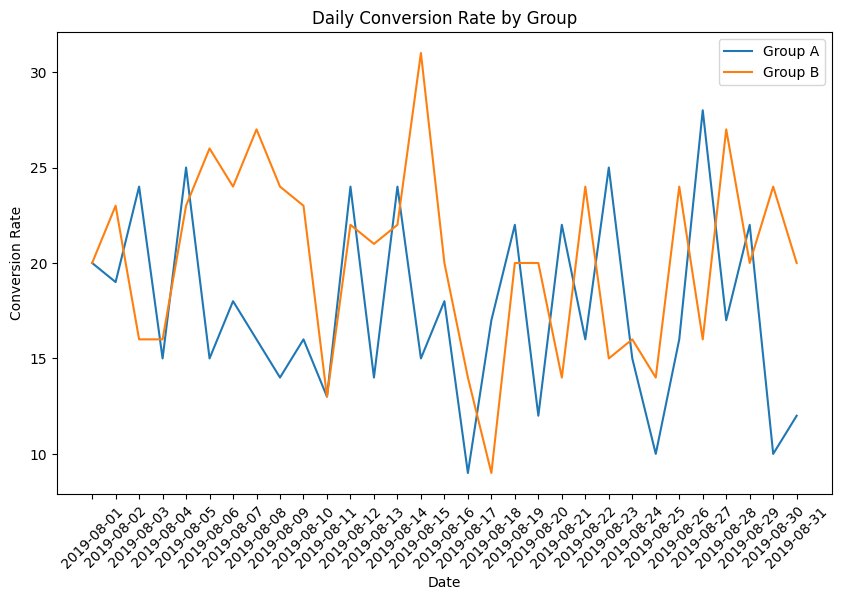

In [30]:
daily_visits = visits_df.groupby(['date', 'group'])['visits'].count().reset_index(name='daily_visits')
daily_orders = orders_df.groupby(['date', 'group'])['visitorId'].nunique().reset_index(name='daily_orders')

daily_data = pd.merge(daily_visits, daily_orders, on=['date', 'group'])

daily_data['conversion_rate'] = daily_data['daily_orders'] / daily_data['daily_visits']

plt.figure(figsize=(10, 6))
for group in daily_data['group'].unique():
    group_data = daily_data[daily_data['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], label=f'Group {group}')

plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Daily Conversion Rate by Group')
plt.legend()
plt.xticks(rotation=45)
plt.show()


No gráfico de taxa de conversão diária por grupo, as linhas para os grupos A e B apresentam um comportamento similar (ziguezagueando juntas) ao longo do tempo, exceto pelo mês de agosto de 2019, onde há uma separação mais notável entre as duas linhas. Isso sugere que, no agosto de 2019, houve uma variação significativa na taxa de conversão entre os dois grupos, enquanto no restante do período, ambos os grupos apresentaram comportamentos relativamente semelhantes.


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Conversão diária analisada com profundidade.
</div>


# Diferença relativa na conversão cumulativa entre os grupos

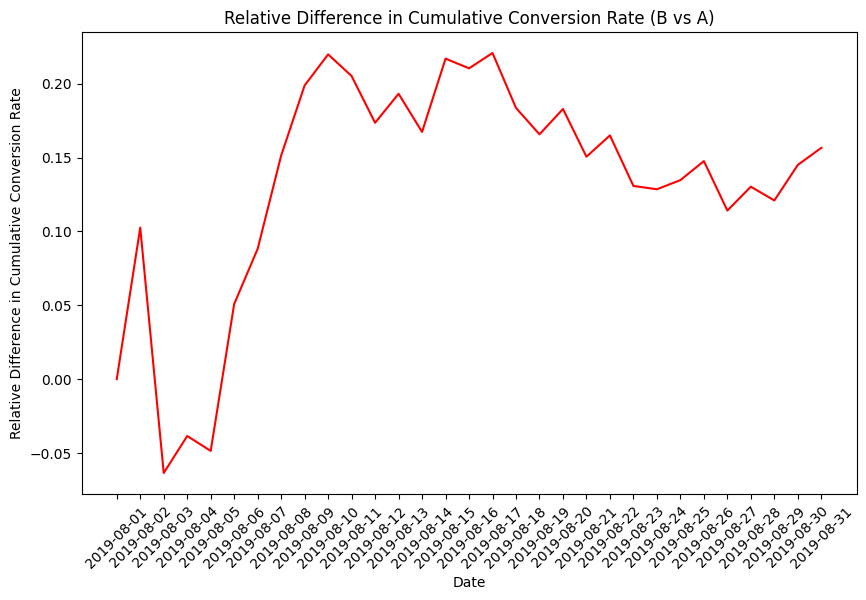

In [31]:
daily_data['cumulative_conversion_rate'] = daily_data.groupby('group')['conversion_rate'].cumsum()

group_a = daily_data[daily_data['group'] == 'A']
group_b = daily_data[daily_data['group'] == 'B']
merged_conversion = pd.merge(group_a[['date', 'cumulative_conversion_rate']], 
                             group_b[['date', 'cumulative_conversion_rate']], 
                             on='date', 
                             suffixes=('_A', '_B'))

merged_conversion['relative_diff'] = (merged_conversion['cumulative_conversion_rate_B'] - merged_conversion['cumulative_conversion_rate_A']) / merged_conversion['cumulative_conversion_rate_A']

plt.figure(figsize=(10, 6))
plt.plot(merged_conversion['date'], merged_conversion['relative_diff'], label='Relative Difference in Conversion (B vs A)', color='red')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Cumulative Conversion Rate')
plt.title('Relative Difference in Cumulative Conversion Rate (B vs A)')
plt.xticks(rotation=45)
plt.show()


A linha resultante indica a variação entre as taxas acumuladas dos dois grupos, refletindo como o grupo B se comportou em relação ao grupo A em termos de conversão.

# Calcular percentis e verificar anomalias

In [34]:
orders_per_user = orders_df.groupby('visitorId')['transactionId'].count()

percentile_95 = orders_per_user.quantile(0.95)
percentile_99 = orders_per_user.quantile(0.99)

print(f"Percentil 95: {percentile_95}, Percentil 99: {percentile_99}")


Percentil 95: 2.0, Percentil 99: 4.0


Ao analisar uma distribuição de dados, os valores no percentil 95 e percentil 99 representam os limites superiores de uma certa proporção de dados.

- Percentil 95: 2.0
Isso significa que 95% dos dados estão abaixo de 2.0. Ou seja, a maior parte dos valores na distribuição são menores ou iguais a 2.0, e apenas 5% dos valores são superiores a 2.0.

- Percentil 99: 4.0
Isso significa que 99% dos dados estão abaixo de 4.0. Ou seja, apenas 1% dos valores são superiores a 4.0, e a grande maioria (99%) está abaixo ou é igual a 4.0.

- Em resumo: 
95% dos dados estão abaixo de 2.0.
99% dos dados estão abaixo de 4.0.

# Testes de significância estatística

In [35]:
from scipy import stats

conversion_a = daily_data[daily_data['group'] == 'A']['conversion_rate']
conversion_b = daily_data[daily_data['group'] == 'B']['conversion_rate']
t_stat_conversion, p_value_conversion = stats.ttest_ind(conversion_a, conversion_b)

order_size_a = orders_df[orders_df['group'] == 'A']['revenue']
order_size_b = orders_df[orders_df['group'] == 'B']['revenue']
t_stat_size, p_value_size = stats.ttest_ind(order_size_a, order_size_b)

print(f"P-Value for Conversion Rate: {p_value_conversion}")
print(f"P-Value for Average Order Size: {p_value_size}")


P-Value for Conversion Rate: 0.03367832287346329
P-Value for Average Order Size: 0.4041179448526676


A interpretação dos p-values para as métricas de taxa de conversão e tamanho médio de pedido indica como os resultados observados em relação a essas métricas se comparam com a hipótese nula (geralmente a hipótese de que não há diferença ou efeito).

- A taxa de conversão apresenta uma diferença estatisticamente significativa, o que sugere que há uma relação real ou efeito entre os grupos comparados.
- O tamanho médio de pedido, por outro lado, não apresenta uma diferença significativa, indicando que qualquer variação observada pode ser atribuída ao acaso, e não há evidências fortes para afirmar que há uma diferença substancial entre os grupos ou variáveis comparadas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>


# Conclusão

Neste projeto priorizei hipóteses e analisei um teste A/B com o objetivo de aumentar a receita da loja online.

- Priorização de Hipóteses
ICE vs RICE: Utilizei o modelo ICE para classificar as hipóteses com base no impacto, confiança e esforço necessário.
Quando apliquei o RICE, que também considera o alcance (reach), as prioridades mudaram, pois passei a considerar o potencial de atingir mais pessoas, além dos recursos e impactos.

- Análise do Teste A/B
Receita Acumulada: Comparando a receita acumulada de ambos os grupos, pude observar se houve diferença significativa no desempenho.

- Tamanho Médio do Pedido: analisei se o valor médio das compras mudou entre os grupos, ajudando a entender o impacto das alterações feitas.

- Taxa de Conversão: observei qual grupo teve melhor taxa de conversão (quantos visitantes se transformaram em compradores), o que é crucial para medir a eficácia das mudanças.

- Anomalias e Padrões: identifiquei possíveis anomalias no número de pedidos e nos preços, o que nos ajudou a detectar comportamentos incomuns de usuários.

- Significância Estatística: calculei a diferença estatística entre os grupos para garantir que os resultados observados não foram aleatórios.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Conclusão apresentada como solicitado.
</div>
